## Data Overview

In [1]:
# read all files names
import numpy as np 
import pandas as pd

import os

all_file_names = []
for dirname, _, filenames in os.walk('/kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/'):
    for filename in filenames:
        all_file_names.append(os.path.join(dirname, filename))

print("Number of data files", len(all_file_names))

Number of data files 253


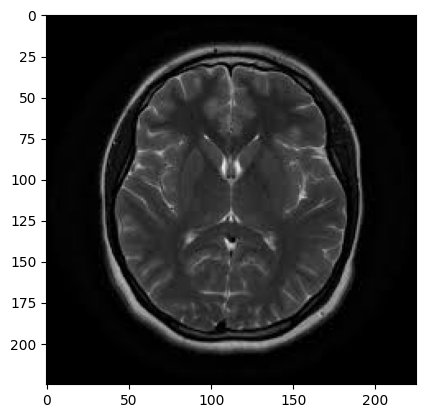

In [2]:
# Plot sample image
import cv2
import matplotlib.pyplot as plt
img = cv2.imread(all_file_names[10])
plt.imshow(img)

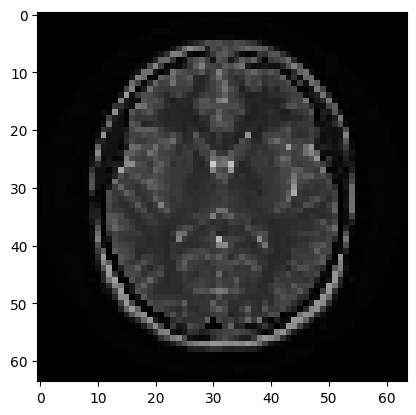

In [3]:
# Resize the image
NEW_DIM = 64, 64
resized_img = cv2.resize(img, NEW_DIM)
plt.imshow(resized_img)

In [4]:
# Create data loader
import torch
import torchvision.transforms as transforms
#import torchvision.utils as vutils
from torchvision import datasets
from torch.utils.data import Subset

batch_size = 64
NEW_DIM = 64, 64
datadir = '/kaggle/input/brain-mri-images-for-brain-tumor-detection'
dataset = datasets.ImageFolder(root=datadir,
                               transform=transforms.Compose([
                               transforms.Resize(NEW_DIM[0]),
                               transforms.CenterCrop(NEW_DIM[0]),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]))

dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                         shuffle=True)

device = torch.device("cuda" if (torch.cuda.is_available()) else "cpu")

## DCGAN model

In [5]:
"""This model is adopted from https://www.kaggle.com/code/maimunulkjisan/dcgan-in-action-generating-images"""
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data

class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            nn.ConvTranspose2d( in_ch, 64 * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(64 * 8),
            nn.ReLU(True),
     
            nn.ConvTranspose2d(64 * 8, 64 * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64 * 4),
            nn.ReLU(True),
    
            nn.ConvTranspose2d( 64 * 4, 64 * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64 * 2),
            nn.ReLU(True),

            nn.ConvTranspose2d( 64 * 2, 64, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
          
            nn.ConvTranspose2d( 64, num_ch, 4, 2, 1, bias=False),
            nn.Tanh())

    def forward(self, input):
        return self.main(input)



class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            nn.Conv2d(num_ch, 64, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            
            nn.Conv2d(64, 64 * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64 * 2),
            nn.LeakyReLU(0.2, inplace=True),
    
            nn.Conv2d(64 * 2, 64 * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64 * 4),
            nn.LeakyReLU(0.2, inplace=True),
      
            nn.Conv2d(64 * 4, 64 * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64 * 8),
            nn.LeakyReLU(0.2, inplace=True),
       
            nn.Conv2d(64 * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid())

    def forward(self, input):
        return self.main(input)

Epoch 0 , DLoss:  4.479596436023712 , GLoss:  36.17371153831482


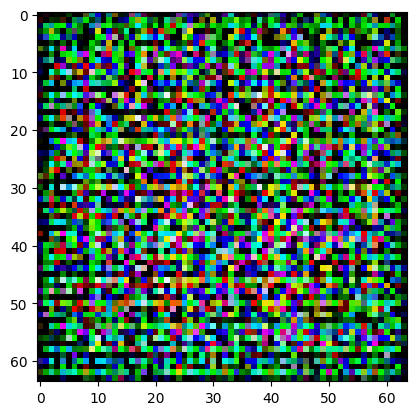

Epoch 1 , DLoss:  0.6904022544622421 , GLoss:  56.26408243179321
Epoch 2 , DLoss:  0.3331493902951479 , GLoss:  64.37716102600098
Epoch 3 , DLoss:  0.3035634960979223 , GLoss:  71.62719345092773
Epoch 4 , DLoss:  1.35395039152354 , GLoss:  97.63786363601685
Epoch 5 , DLoss:  1.85187593230512 , GLoss:  129.97685432434082
Epoch 6 , DLoss:  4.22362529556267 , GLoss:  118.07194185256958
Epoch 7 , DLoss:  0.5932526167016476 , GLoss:  121.75947856903076
Epoch 8 , DLoss:  3.83677590591833 , GLoss:  112.32435321807861
Epoch 9 , DLoss:  3.7699194569140673 , GLoss:  91.42053318023682
Epoch 10 , DLoss:  1.6730384044349194 , GLoss:  76.8700623512268
Epoch 11 , DLoss:  1.7828626334667206 , GLoss:  50.10131788253784
Epoch 12 , DLoss:  12.449974432587624 , GLoss:  68.15445554256439
Epoch 13 , DLoss:  7.239068269729614 , GLoss:  50.80047416687012
Epoch 14 , DLoss:  7.861692309379578 , GLoss:  47.97559952735901
Epoch 15 , DLoss:  3.3826165348291397 , GLoss:  39.48477125167847
Epoch 16 , DLoss:  6.52670

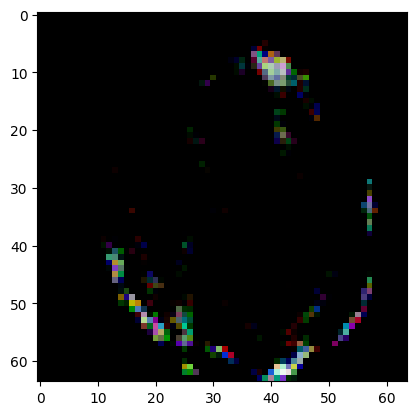

Epoch 51 , DLoss:  1.6608314737677574 , GLoss:  41.8135461807251
Epoch 52 , DLoss:  2.404103897511959 , GLoss:  42.865525245666504
Epoch 53 , DLoss:  4.287737073376775 , GLoss:  56.51285219192505
Epoch 54 , DLoss:  2.248268574476242 , GLoss:  45.639676570892334
Epoch 55 , DLoss:  1.813330039381981 , GLoss:  47.14883232116699
Epoch 56 , DLoss:  2.3448366075754166 , GLoss:  52.563355684280396
Epoch 57 , DLoss:  4.220870710909367 , GLoss:  54.088929653167725
Epoch 58 , DLoss:  1.9487073048949242 , GLoss:  55.18920278549194
Epoch 59 , DLoss:  1.6813333183526993 , GLoss:  49.469234466552734
Epoch 60 , DLoss:  2.1960482373833656 , GLoss:  51.87602233886719
Epoch 61 , DLoss:  1.4401398748159409 , GLoss:  44.528329372406006
Epoch 62 , DLoss:  4.98893141746521 , GLoss:  61.182162046432495
Epoch 63 , DLoss:  1.8040152713656425 , GLoss:  44.103588819503784
Epoch 64 , DLoss:  2.5388752222061157 , GLoss:  54.827983379364014
Epoch 65 , DLoss:  2.8227514103055 , GLoss:  52.86711502075195
Epoch 66 , D

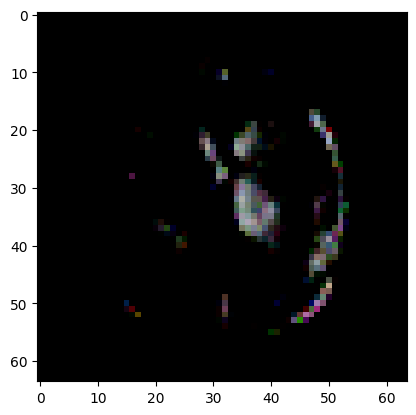

Epoch 101 , DLoss:  1.6392614468932152 , GLoss:  45.53359341621399
Epoch 102 , DLoss:  1.4840344190597534 , GLoss:  48.48007535934448
Epoch 103 , DLoss:  1.27817352861166 , GLoss:  44.184030294418335
Epoch 104 , DLoss:  4.240130320191383 , GLoss:  49.205246925354004
Epoch 105 , DLoss:  1.8478725776076317 , GLoss:  46.49353742599487
Epoch 106 , DLoss:  7.232242330908775 , GLoss:  52.2406964302063
Epoch 107 , DLoss:  3.1992708183825016 , GLoss:  46.176552534103394
Epoch 108 , DLoss:  2.021580532193184 , GLoss:  41.7784469127655
Epoch 109 , DLoss:  2.1404993757605553 , GLoss:  48.18137454986572
Epoch 110 , DLoss:  1.317842110991478 , GLoss:  38.960195541381836
Epoch 111 , DLoss:  1.4552011229097843 , GLoss:  43.10367250442505
Epoch 112 , DLoss:  1.1108889132738113 , GLoss:  37.08468723297119
Epoch 113 , DLoss:  1.5457569882273674 , GLoss:  38.399723529815674
Epoch 114 , DLoss:  1.527380347251892 , GLoss:  44.90911912918091
Epoch 115 , DLoss:  0.9434679709374905 , GLoss:  39.36835193634033

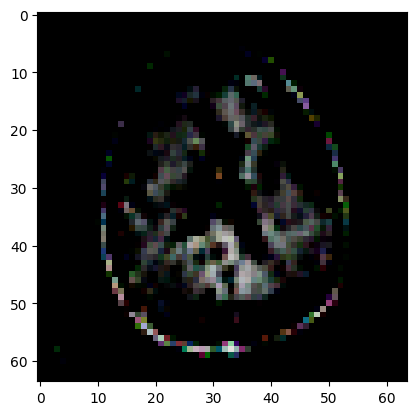

Epoch 151 , DLoss:  0.8857458643615246 , GLoss:  40.89369487762451
Epoch 152 , DLoss:  1.8387273326516151 , GLoss:  47.113346099853516
Epoch 153 , DLoss:  1.0158797949552536 , GLoss:  44.23413133621216
Epoch 154 , DLoss:  0.8451963104307652 , GLoss:  37.90042495727539
Epoch 155 , DLoss:  3.4408086016774178 , GLoss:  63.86654591560364
Epoch 156 , DLoss:  1.1843136474490166 , GLoss:  42.772605419158936
Epoch 157 , DLoss:  0.8599065989255905 , GLoss:  40.040563344955444
Epoch 158 , DLoss:  1.1180453039705753 , GLoss:  41.79431223869324
Epoch 159 , DLoss:  2.600976001471281 , GLoss:  56.41688406467438
Epoch 160 , DLoss:  5.146724358201027 , GLoss:  55.81118631362915
Epoch 161 , DLoss:  1.199493519961834 , GLoss:  43.0132417678833
Epoch 162 , DLoss:  1.168641060590744 , GLoss:  45.89936923980713
Epoch 163 , DLoss:  1.853601474314928 , GLoss:  54.1492383480072
Epoch 164 , DLoss:  0.9600138813257217 , GLoss:  38.725921630859375
Epoch 165 , DLoss:  0.9450420141220093 , GLoss:  40.2835164070129

In [6]:
"""Training Loop for CNN based GAN"""
num_ch = 3
in_ch = 100
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
loss_func = nn.BCELoss()
G = Generator().to(device)
D = Discriminator().to(device)
optimizerD = optim.Adam(D.parameters(), lr=2e-4, betas=(0.5, 0.999))
optimizerG = optim.Adam(G.parameters(), lr=2e-4, betas=(0.5, 0.999))

sample_noise = torch.randn(64, in_ch, 1, 1, device=device)

G_losses = []
D_losses = []
num_epochs = 200
for epoch in range(num_epochs):
    G_losses = 0
    D_losses = 0
    for data in dataloader:
        real_label = 1.0
        fake_label = 0.0
        
        D.zero_grad()
        real_cpu = data[0].to(device)
        b_size = real_cpu.size(0)
        label = torch.full((b_size,), real_label, dtype=torch.float, device=device)
        output = D(real_cpu).view(-1)
        errD_real = loss_func(output, label)
        errD_real.backward()
        D_x = output.mean().item()

        noise = torch.randn(b_size, in_ch, 1, 1, device=device)
        fake = G(noise)
        label.fill_(fake_label)
        output = D(fake.detach()).view(-1)
        errD_fake = loss_func(output, label)
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        errD = errD_real + errD_fake
        optimizerD.step()

        G.zero_grad()
        label.fill_(real_label)
        output = D(fake).view(-1)
        errG = loss_func(output, label)
        errG.backward()
        D_G_z2 = output.mean().item()
        optimizerG.step()
                
        G_losses += (errG.item())
        D_losses += (errD.item())

    print("Epoch", epoch, ", DLoss: ", D_losses, ", GLoss: ", G_losses)
    if epoch%50 == 0:
        with torch.no_grad():
            fake = G(sample_noise).detach().cpu()
        img = fake[0].cpu().permute(1, 2, 0).numpy()
        #img = (img - img.min())/(img.max() - img.min())
        plt.imshow(img)
        plt.show()

## Visualization

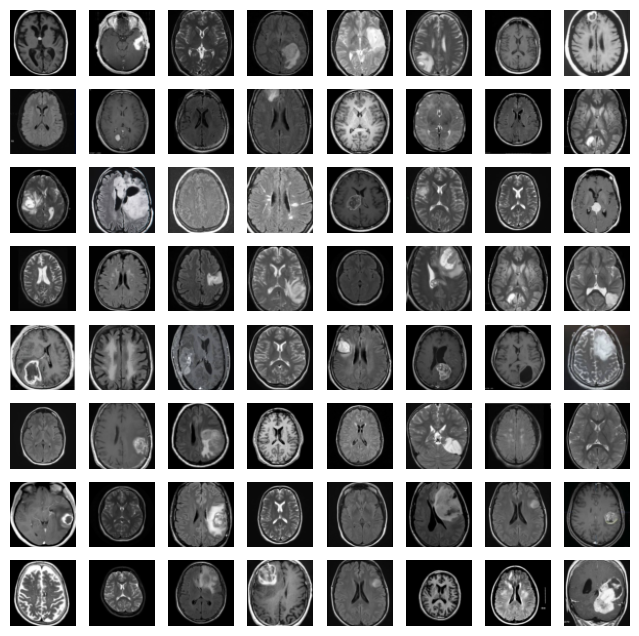

In [8]:
# Real images
batch1 = next(iter(dataloader))
batch2 = next(iter(dataloader))
batch3 = next(iter(dataloader))

fig, axes = plt.subplots(8, 8, figsize=(8, 8))

real_images_scaled = []
for i, ax in enumerate(axes.flat):
    img = batch1[0][i].cpu().permute(1, 2, 0).numpy()
    img = (img + 1) / 2.0
    real_images_scaled.append(img)
    ax.imshow(img)
    ax.axis("off")

for i in range(64):
    img = batch2[0][i].cpu().permute(1, 2, 0).numpy()
    img = (img + 1) / 2.0
    real_images_scaled.append(img)

for i in range(64):
    img = batch3[0][i].cpu().permute(1, 2, 0).numpy()
    img = (img + 1) / 2.0
    real_images_scaled.append(img)

fig.savefig("real_images.pdf", bbox_inches='tight')
plt.show()

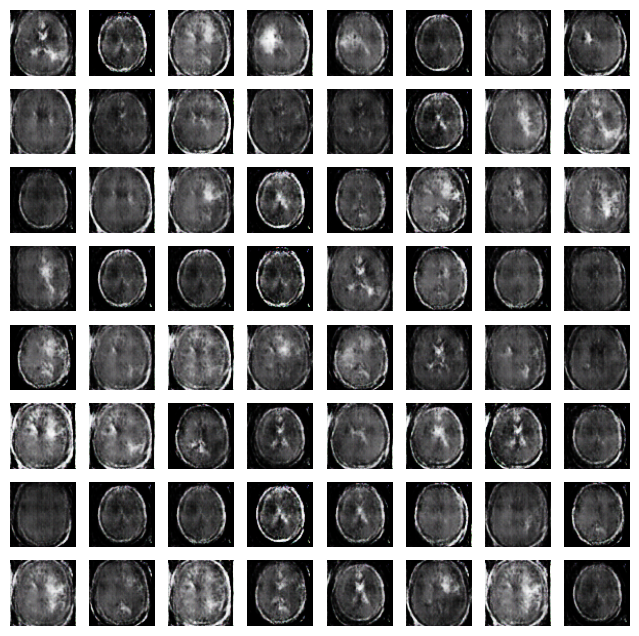

In [9]:
# fake images
fixed_noise = torch.randn(64, in_ch, 1, 1, device=device)
with torch.no_grad():
    fake_images = G(fixed_noise).detach().cpu()

fig, axes = plt.subplots(8, 8, figsize=(8, 8))

fake_images_scaled = []
for i, ax in enumerate(axes.flat):
    img = fake_images[i].cpu().permute(1, 2, 0).numpy()
    img = (img + 1) / 2.0
    fake_images_scaled.append(img)
    ax.imshow(img)
    ax.axis("off")

fixed_noise = torch.randn(64, in_ch, 1, 1, device=device)
with torch.no_grad():
    fake_images = G(fixed_noise).detach().cpu()
for i in range(64):
    img = fake_images[i].cpu().permute(1, 2, 0).numpy()
    img = (img + 1) / 2.0
    fake_images_scaled.append(img)

fixed_noise = torch.randn(64, in_ch, 1, 1, device=device)
with torch.no_grad():
    fake_images = G(fixed_noise).detach().cpu()
for i in range(64):
    img = fake_images[i].cpu().permute(1, 2, 0).numpy()
    img = (img + 1) / 2.0
    fake_images_scaled.append(img)
fig.savefig("model_1_images.pdf", bbox_inches='tight')
plt.show()

In [10]:
import numpy as np
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio

import torch
import torch.nn as nn
from torchvision.models import vgg16
from torchvision import transforms
from PIL import Image
from sklearn.metrics.pairwise import cosine_similarity


class ImageSimilarity:
    def __init__(self, device="cpu"):
        self.device = device

        # Pretrained VGG16 for perceptual similarity (deep features)
        self.vgg = vgg16(pretrained=True).features[:16]  # conv3 layer
        self.vgg.eval().to(self.device)

        self.transform = transforms.Compose([
            transforms.Resize((64, 64)),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406],
                                 [0.229, 0.224, 0.225])
        ])

    def _preprocess(self, img_np):
        """Convert numpy array (H,W,C) -> tensor for VGG."""
        if img_np.min() < 0:  # rescale if in [-1,1]
            img_np = ((img_np + 1) * 127.5).astype(np.uint8)
        else:
            img_np = img_np.astype(np.uint8)

        img = Image.fromarray(img_np)
        return self.transform(img).unsqueeze(0).to(self.device)

    def mse(self, img1, img2):
        """Mean Squared Error (lower = more similar)."""
        return mean_squared_error(img1, img2)

    def psnr(self, img1, img2):
        """Peak Signal-to-Noise Ratio (higher = better)."""
        return peak_signal_noise_ratio(img1, img2, data_range=img1.max() - img1.min())

    def ssim_score(self, img1, img2):
        """Structural Similarity Index (higher = more similar)."""
        if img1.ndim == 3 and img1.shape[2] == 3:
            img1 = np.mean(img1, axis=2)
            img2 = np.mean(img2, axis=2)
        return ssim(img1, img2, data_range=img1.max() - img1.min(), multichannel=True)

    def perceptual_similarity(self, img1, img2):
        """Perceptual similarity via VGG features + cosine similarity."""
        t1 = img1
        t2 = img2

        with torch.no_grad():
            f1 = self.vgg(t1).flatten().cpu().numpy().reshape(1, -1)
            f2 = self.vgg(t2).flatten().cpu().numpy().reshape(1, -1)

        return cosine_similarity(f1, f2)[0, 0]

    def compare(self, img1, img2):
        """Return multiple similarity metrics."""
        return {
            "MSE": self.mse(img1, img2),
            "PSNR": self.psnr(img1, img2),
            "SSIM": self.ssim_score(img1, img2),
            #"Perceptual (VGG Cosine)": self.perceptual_similarity(img1, img2)
        }

In [11]:
from tqdm import tqdm
fake_images_scaled = np.array(fake_images_scaled)
real_images_scaled = np.array(real_images_scaled)

compare = ImageSimilarity()

psnr_count = []
for fake_img in tqdm(fake_images_scaled):
    for real_img in real_images_scaled:
        psnr_count.append(compare.psnr(real_img, fake_img))

mse_count = []
for fake_img in tqdm(fake_images_scaled):
    for real_img in real_images_scaled:
        mse_count.append(compare.mse(real_img, fake_img))

ssim_score_count = []
for fake_img in tqdm(fake_images_scaled):
    for real_img in real_images_scaled:
        ssim_score_count.append(compare.ssim_score(real_img, fake_img))

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:03<00:00, 169MB/s]  
100%|██████████| 192/192 [00:26<00:00,  7.32it/s]


In [12]:
import numpy as np
import matplotlib.pyplot as plt

def plot_hist(data, what2plot="count"):

    # Plot histogram
    plt.figure(figsize=(8,6))
    plt.hist(data, bins=6, alpha=0.7, color='skyblue', edgecolor='black')
    
    # Increase font sizes
    plt.xlabel(what2plot, fontsize=16)         # x-axis label
    plt.ylabel('Frequency', fontsize=16)     # y-axis label
    plt.xticks(fontsize=14)                  # x-axis ticks
    plt.yticks(fontsize=14)                  # y-axis ticks
    plt.grid(axis='y', alpha=0.75)
    
    # Save as PDF
    plt.savefig(what2plot+'histogram.pdf', format='pdf')
    
    plt.show()

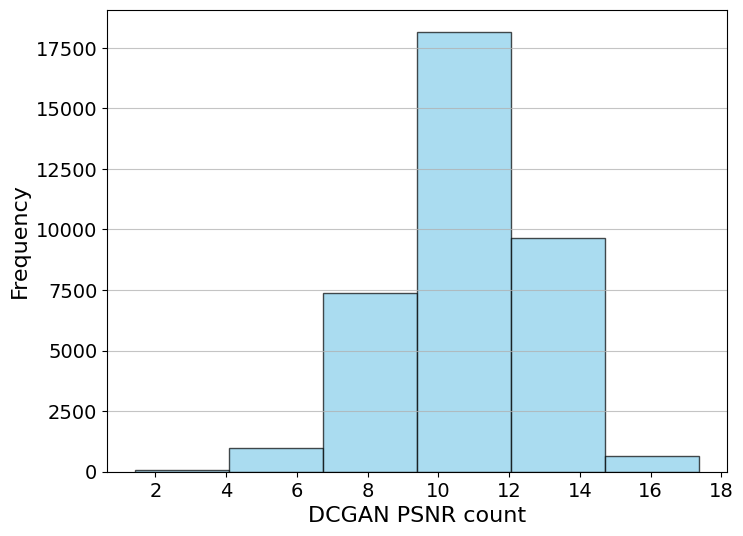

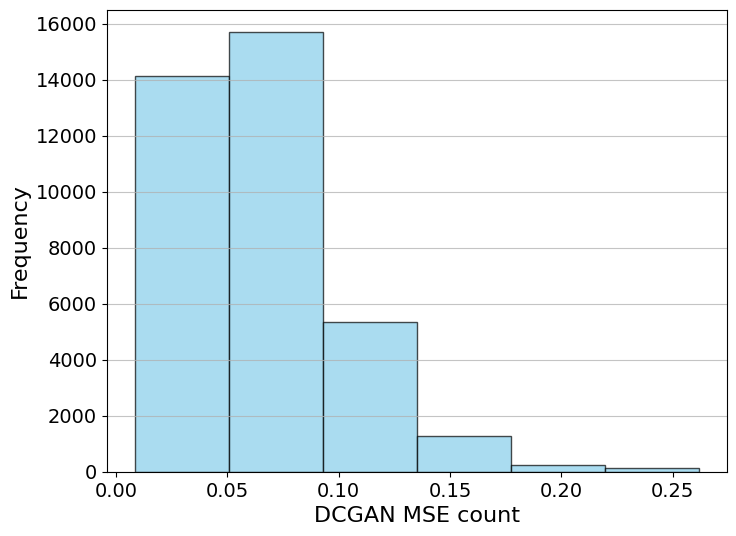

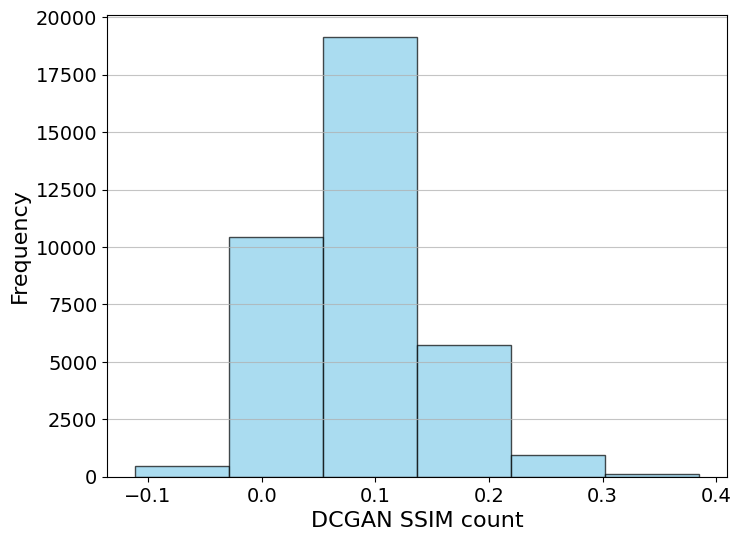

In [13]:
import matplotlib.pyplot as plt

plot_hist(psnr_count, what2plot="DCGAN PSNR count")
plot_hist(mse_count, what2plot="DCGAN MSE count")
plot_hist(ssim_score_count, what2plot="DCGAN SSIM count")

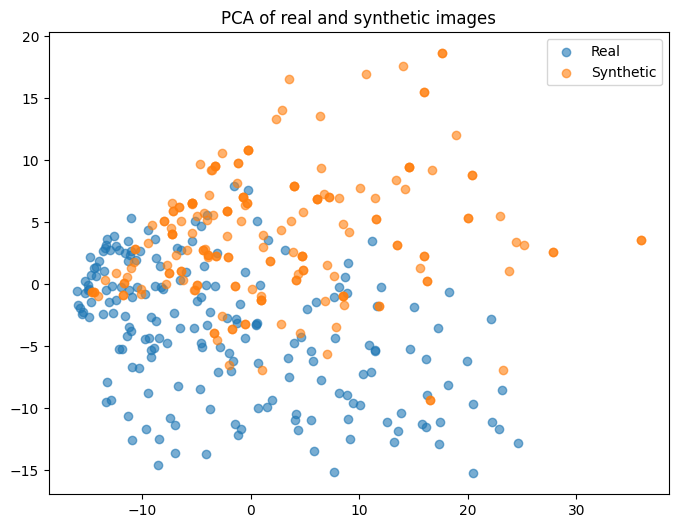

In [14]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

fake_images_scaled = np.array(fake_images_scaled)
real_images_scaled = np.array(real_images_scaled)
fake_images_scaled = fake_images_scaled.reshape(fake_images_scaled.shape[0], -1)
real_images_scaled = real_images_scaled.reshape(real_images_scaled.shape[0], -1)
X = np.vstack((fake_images_scaled, real_images_scaled))
y = np.array([0]*len(fake_images_scaled) + [1]*len(real_images_scaled))  # labels: 0=A, 1=B

pca = PCA(n_components=2)
X_embedded = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_embedded[y==0, 0], X_embedded[y==0, 1], label="Real", alpha=0.6)
plt.scatter(X_embedded[y==1, 0], X_embedded[y==1, 1], label="Synthetic", alpha=0.6)
plt.legend()
plt.title("PCA of real and synthetic images")
plt.savefig("model_1_pca.pdf", bbox_inches='tight')
plt.show()

## Pix2Pix Model

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
import torchvision.utils as vutils
import numpy as np
from PIL import Image
import os


class UNetGenerator(nn.Module):
    def __init__(self, in_channels=3, out_channels=3):
        super(UNetGenerator, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(in_channels, 64, 4, 2, 1), nn.LeakyReLU(0.2),
            nn.Conv2d(64, 128, 4, 2, 1), nn.BatchNorm2d(128), nn.LeakyReLU(0.2),
            nn.Conv2d(128, 256, 4, 2, 1), nn.BatchNorm2d(256), nn.LeakyReLU(0.2)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(256, 128, 4, 2, 1), nn.BatchNorm2d(128), nn.ReLU(),
            nn.ConvTranspose2d(128, 64, 4, 2, 1), nn.BatchNorm2d(64), nn.ReLU(),
            nn.ConvTranspose2d(64, out_channels, 4, 2, 1), nn.Tanh()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

class Discriminator(nn.Module):
    def __init__(self, in_channels=6):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(in_channels, 64, 4, 2, 1), nn.LeakyReLU(0.2),
            nn.Conv2d(64, 128, 4, 2, 1), nn.BatchNorm2d(128), nn.LeakyReLU(0.2),
            nn.Conv2d(128, 256, 4, 2, 1), nn.BatchNorm2d(256), nn.LeakyReLU(0.2),
            nn.Conv2d(256, 1, 4, 1, 1), nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)


In [16]:
# Create data loader
import torch
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import Subset

batch_size = 64
NEW_DIM = 64, 64
datadir = '/kaggle/input/brain-mri-images-for-brain-tumor-detection'
dataset = datasets.ImageFolder(root=datadir,
                               transform=transforms.Compose([
                               transforms.Resize(NEW_DIM[0]),
                               transforms.CenterCrop(NEW_DIM[0]),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]))

batch_size=64
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                         shuffle=True)
device = torch.device("cuda" if (torch.cuda.is_available()) else "cpu")

Epoch [1/200] | Loss_D: 0.3626 | Loss_G: 37.8891


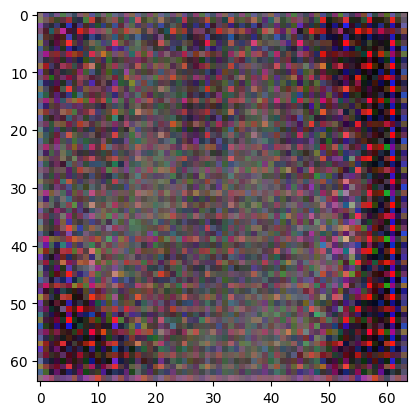

Epoch [2/200] | Loss_D: 0.2418 | Loss_G: 32.8097
Epoch [3/200] | Loss_D: 0.1769 | Loss_G: 24.2533
Epoch [4/200] | Loss_D: 0.1359 | Loss_G: 21.3419
Epoch [5/200] | Loss_D: 0.1794 | Loss_G: 21.1072
Epoch [6/200] | Loss_D: 0.2077 | Loss_G: 18.8100
Epoch [7/200] | Loss_D: 0.2827 | Loss_G: 17.8130
Epoch [8/200] | Loss_D: 0.1561 | Loss_G: 16.9752
Epoch [9/200] | Loss_D: 0.7029 | Loss_G: 16.7247
Epoch [10/200] | Loss_D: 0.1336 | Loss_G: 19.5984
Epoch [11/200] | Loss_D: 0.3055 | Loss_G: 14.8812
Epoch [12/200] | Loss_D: 0.1122 | Loss_G: 15.0001
Epoch [13/200] | Loss_D: 0.1172 | Loss_G: 14.0187
Epoch [14/200] | Loss_D: 0.0763 | Loss_G: 14.0676
Epoch [15/200] | Loss_D: 0.2456 | Loss_G: 12.6877
Epoch [16/200] | Loss_D: 0.0669 | Loss_G: 13.9840
Epoch [17/200] | Loss_D: 0.0481 | Loss_G: 13.8741
Epoch [18/200] | Loss_D: 0.0753 | Loss_G: 12.8150
Epoch [19/200] | Loss_D: 0.0264 | Loss_G: 14.4964
Epoch [20/200] | Loss_D: 0.0324 | Loss_G: 17.5110
Epoch [21/200] | Loss_D: 0.0502 | Loss_G: 13.4468
Epoch [2

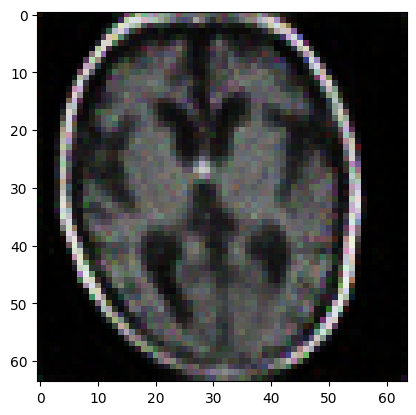

Epoch [52/200] | Loss_D: 0.0601 | Loss_G: 9.8646
Epoch [53/200] | Loss_D: 0.0336 | Loss_G: 12.0370
Epoch [54/200] | Loss_D: 0.0220 | Loss_G: 11.2989
Epoch [55/200] | Loss_D: 0.0161 | Loss_G: 11.9428
Epoch [56/200] | Loss_D: 0.0132 | Loss_G: 11.8775
Epoch [57/200] | Loss_D: 0.0242 | Loss_G: 10.7780
Epoch [58/200] | Loss_D: 0.0481 | Loss_G: 10.5031
Epoch [59/200] | Loss_D: 0.0179 | Loss_G: 10.6958
Epoch [60/200] | Loss_D: 0.0051 | Loss_G: 15.0058
Epoch [61/200] | Loss_D: 0.0068 | Loss_G: 14.0490
Epoch [62/200] | Loss_D: 0.0187 | Loss_G: 11.1633
Epoch [63/200] | Loss_D: 0.0062 | Loss_G: 13.7810
Epoch [64/200] | Loss_D: 0.0069 | Loss_G: 13.8065
Epoch [65/200] | Loss_D: 0.0108 | Loss_G: 14.3535
Epoch [66/200] | Loss_D: 0.0046 | Loss_G: 13.6910
Epoch [67/200] | Loss_D: 0.0115 | Loss_G: 10.8714
Epoch [68/200] | Loss_D: 1.1893 | Loss_G: 8.1853
Epoch [69/200] | Loss_D: 0.7106 | Loss_G: 6.5827
Epoch [70/200] | Loss_D: 0.7546 | Loss_G: 6.6404
Epoch [71/200] | Loss_D: 0.6595 | Loss_G: 6.2973
Epoch

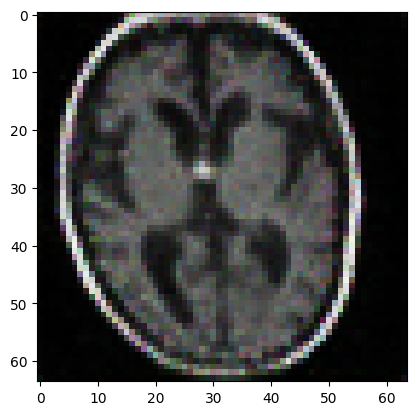

Epoch [102/200] | Loss_D: 0.0210 | Loss_G: 11.3947
Epoch [103/200] | Loss_D: 1.7964 | Loss_G: 6.5897
Epoch [104/200] | Loss_D: 0.4120 | Loss_G: 6.8370
Epoch [105/200] | Loss_D: 0.5401 | Loss_G: 8.5329
Epoch [106/200] | Loss_D: 0.0816 | Loss_G: 9.2135
Epoch [107/200] | Loss_D: 0.0496 | Loss_G: 9.2895
Epoch [108/200] | Loss_D: 0.0369 | Loss_G: 9.4479
Epoch [109/200] | Loss_D: 0.0144 | Loss_G: 13.0063
Epoch [110/200] | Loss_D: 0.0238 | Loss_G: 11.2903
Epoch [111/200] | Loss_D: 1.4671 | Loss_G: 7.2964
Epoch [112/200] | Loss_D: 0.4415 | Loss_G: 7.1150
Epoch [113/200] | Loss_D: 0.0844 | Loss_G: 9.5744
Epoch [114/200] | Loss_D: 0.0784 | Loss_G: 8.0574
Epoch [115/200] | Loss_D: 0.0455 | Loss_G: 9.0889
Epoch [116/200] | Loss_D: 0.0180 | Loss_G: 10.8779
Epoch [117/200] | Loss_D: 0.0261 | Loss_G: 10.8641
Epoch [118/200] | Loss_D: 0.0170 | Loss_G: 10.5524
Epoch [119/200] | Loss_D: 0.0191 | Loss_G: 10.3327
Epoch [120/200] | Loss_D: 0.0127 | Loss_G: 11.5076
Epoch [121/200] | Loss_D: 0.0160 | Loss_G:

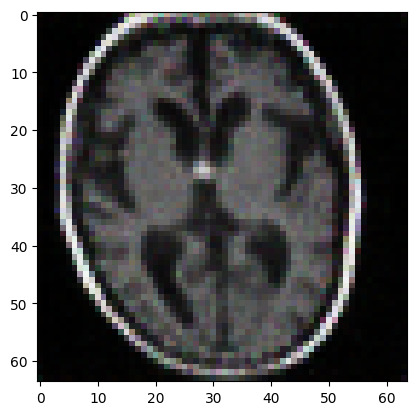

Epoch [152/200] | Loss_D: 0.0045 | Loss_G: 11.7309
Epoch [153/200] | Loss_D: 0.0060 | Loss_G: 10.6811
Epoch [154/200] | Loss_D: 0.0146 | Loss_G: 9.2563
Epoch [155/200] | Loss_D: 0.0048 | Loss_G: 11.9954
Epoch [156/200] | Loss_D: 0.0269 | Loss_G: 8.7519
Epoch [157/200] | Loss_D: 0.0152 | Loss_G: 8.9706
Epoch [158/200] | Loss_D: 0.0044 | Loss_G: 12.4431
Epoch [159/200] | Loss_D: 0.0050 | Loss_G: 10.4351
Epoch [160/200] | Loss_D: 0.0041 | Loss_G: 11.4060
Epoch [161/200] | Loss_D: 0.0051 | Loss_G: 10.9466
Epoch [162/200] | Loss_D: 0.0063 | Loss_G: 10.4071
Epoch [163/200] | Loss_D: 0.0095 | Loss_G: 9.7022
Epoch [164/200] | Loss_D: 0.0024 | Loss_G: 14.2403
Epoch [165/200] | Loss_D: 0.0036 | Loss_G: 13.2350
Epoch [166/200] | Loss_D: 0.0031 | Loss_G: 11.5951
Epoch [167/200] | Loss_D: 0.0072 | Loss_G: 10.0814
Epoch [168/200] | Loss_D: 0.0030 | Loss_G: 13.1743
Epoch [169/200] | Loss_D: 0.0023 | Loss_G: 12.6575
Epoch [170/200] | Loss_D: 1.2284 | Loss_G: 5.9303
Epoch [171/200] | Loss_D: 0.7798 | L

In [19]:
device = "cuda" if torch.cuda.is_available() else "cpu"

G = UNetGenerator().to(device)
D = Discriminator().to(device)

criterion_GAN = nn.BCELoss()
criterion_L1 = nn.L1Loss()

optimizer_G = optim.Adam(G.parameters(), lr=2e-4, betas=(0.5, 0.999))
optimizer_D = optim.Adam(D.parameters(), lr=2e-4, betas=(0.5, 0.999))

num_epochs = 200
for epoch in range(num_epochs):
    for i, (input_img, _) in enumerate(dataloader):
        target_img = input_img
        input_img = input_img.to(device) 
        target_img = target_img.to(device)

        # ------------------
        # Train Discriminator
        # ------------------
        optimizer_D.zero_grad()

        fake_img = G(input_img)
        D_real = D(torch.cat([input_img, target_img], dim=1))
        D_fake = D(torch.cat([input_img, fake_img.detach()], dim=1))

        real_labels = torch.ones_like(D_real, device=device)
        fake_labels = torch.zeros_like(D_fake, device=device)

        loss_D = (criterion_GAN(D_real, real_labels) + criterion_GAN(D_fake, fake_labels)) * 0.5
        loss_D.backward()
        optimizer_D.step()

        # ------------------
        # Train Generator
        # ------------------
        optimizer_G.zero_grad()
        D_fake = D(torch.cat([input_img, fake_img], dim=1))
        loss_G = criterion_GAN(D_fake, real_labels) + 100 * criterion_L1(fake_img, target_img)
        loss_G.backward()
        optimizer_G.step()

    print(f"Epoch [{epoch+1}/{num_epochs}] | Loss_D: {loss_D.item():.4f} | Loss_G: {loss_G.item():.4f}")
    if epoch%50 == 0:
        x = batch1[0]
        with torch.no_grad():
            fake = G(x).detach().cpu()
        img = fake[0].cpu().permute(1, 2, 0).numpy()
        img = (img + 1) / 2.0
        plt.imshow(img)
        plt.show()

### Visualization

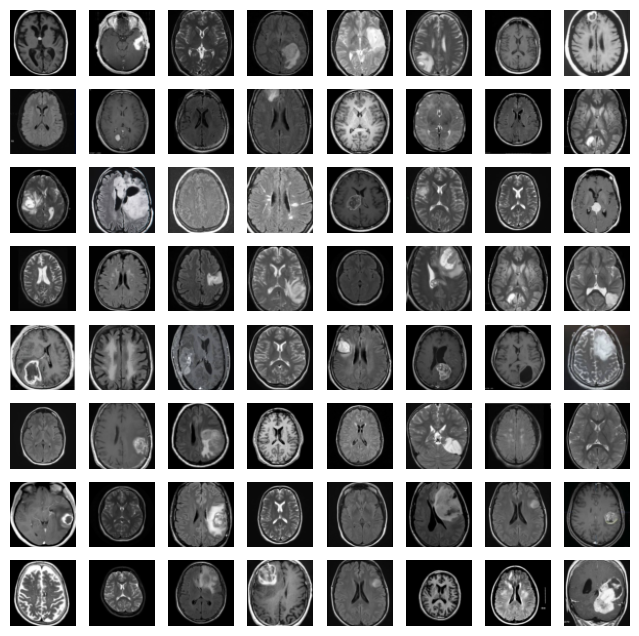

In [36]:
# Real images
#batch1 = next(iter(dataloader))
#batch2 = next(iter(dataloader))
#batch3 = next(iter(dataloader))
fig, axes = plt.subplots(8, 8, figsize=(8, 8))
real_images_scaled = []
for i, ax in enumerate(axes.flat):
    img = batch1[0][i].cpu().permute(1, 2, 0).numpy()
    img = (img + 1) / 2.0
    real_images_scaled.append(img)
    ax.imshow(img)
    ax.axis("off")
fig.savefig("model_2_images.pdf", bbox_inches='tight')
plt.show()
for i in range(64):
    img = batch2[0][i].cpu().permute(1, 2, 0).numpy()
    img = (img + 1) / 2.0
    real_images_scaled.append(img)

for i in range(64):
    img = batch3[0][i].cpu().permute(1, 2, 0).numpy()
    img = (img + 1) / 2.0
    real_images_scaled.append(img)

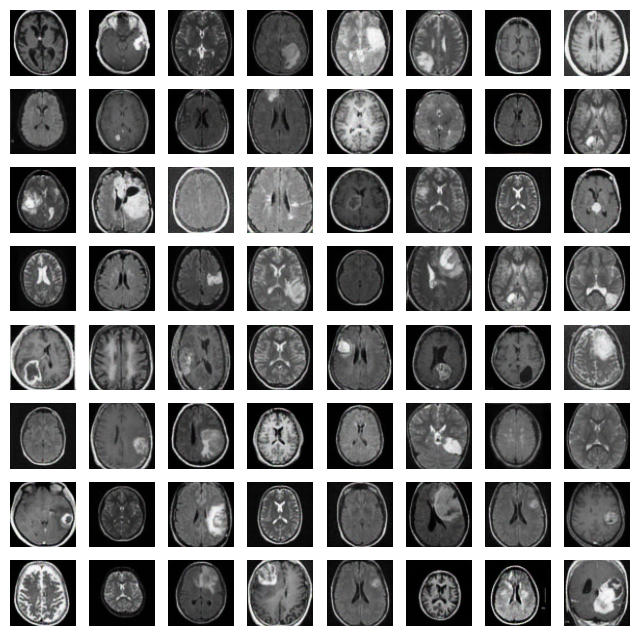

In [37]:
# fake images
fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fake_images_scaled = []
with torch.no_grad():
    fake_images = G(batch1[0]).detach().cpu()
for i, ax in enumerate(axes.flat):
    img = fake_images[i].cpu().permute(1, 2, 0).numpy()
    img = (img + 1) / 2.0
    fake_images_scaled.append(img)
    ax.imshow(img)
    ax.axis("off")
fig.savefig("model_2_fake_images.pdf", bbox_inches='tight')
plt.show()

with torch.no_grad():
    fake_images = G(batch2[0]).detach().cpu()
for i in range(64):
    img = fake_images[i].cpu().permute(1, 2, 0).numpy()
    img = (img + 1) / 2.0
    fake_images_scaled.append(img)
    
with torch.no_grad():
    fake_images = G(batch3[0]).detach().cpu()
for i in range(64):
    img = fake_images[i].cpu().permute(1, 2, 0).numpy()
    img = (img + 1) / 2.0
    fake_images_scaled.append(img)

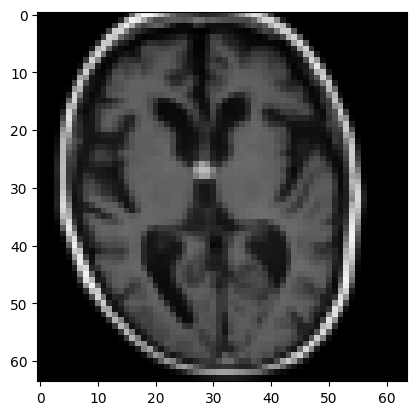

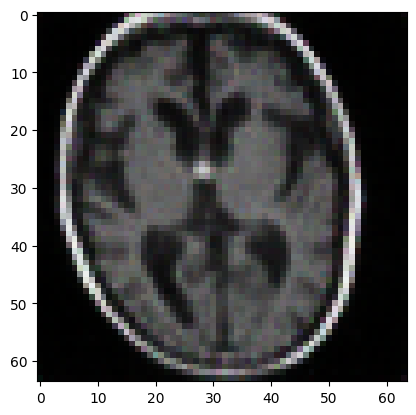

In [42]:
plt.imshow(real_images_scaled[0])
plt.savefig("sample_image_pix2pix_real.pdf", bbox_inches='tight')
plt.show()
plt.imshow(fake_images_scaled[0])
plt.savefig("sample_image_pix2pix_fake.pdf", bbox_inches='tight')
plt.show()

In [29]:
from tqdm import tqdm
fake_images_scaled = np.array(fake_images_scaled)
real_images_scaled = np.array(real_images_scaled)

compare = ImageSimilarity()

psnr_count = []
for fake_img, real_img in zip(fake_images_scaled, real_images_scaled):
    psnr_count.append(compare.psnr(real_img, fake_img))

mse_count = []
for fake_img, real_img in zip(fake_images_scaled, real_images_scaled):
    mse_count.append(compare.mse(real_img, fake_img))

ssim_score_count = []
for fake_img, real_img in zip(fake_images_scaled, real_images_scaled):
    ssim_score_count.append(compare.ssim_score(real_img, fake_img))

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


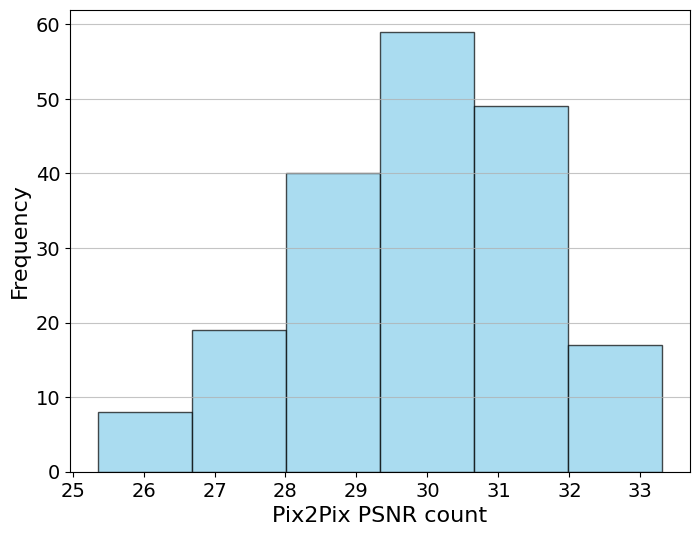

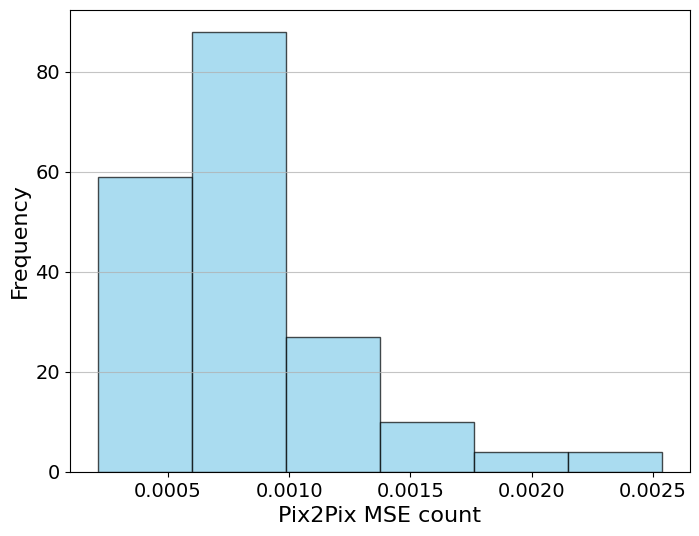

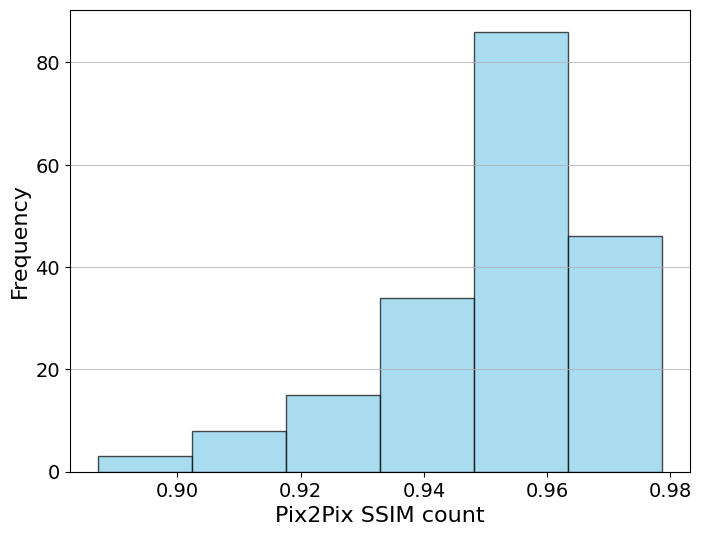

In [30]:
import matplotlib.pyplot as plt

plot_hist(psnr_count, what2plot="Pix2Pix PSNR count")
plot_hist(mse_count, what2plot="Pix2Pix MSE count")
plot_hist(ssim_score_count, what2plot="Pix2Pix SSIM count")

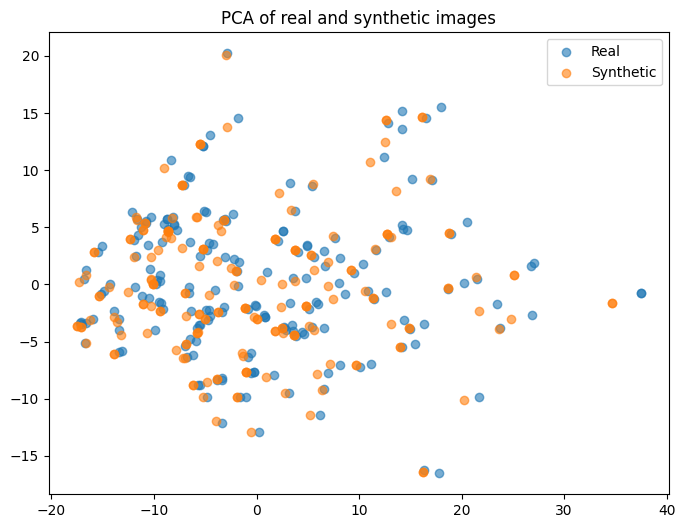

In [31]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

fake_images_scaled = np.array(fake_images_scaled)
real_images_scaled = np.array(real_images_scaled)

fake_images_scaled = fake_images_scaled.reshape(fake_images_scaled.shape[0], -1)
real_images_scaled = real_images_scaled.reshape(real_images_scaled.shape[0], -1)
# Combine datasets
X = np.vstack((fake_images_scaled, real_images_scaled))
y = np.array([0]*len(fake_images_scaled) + [1]*len(real_images_scaled))  # labels: 0=A, 1=B

pca = PCA(n_components=2)
X_embedded = pca.fit_transform(X)

# Plot
plt.figure(figsize=(8,6))
plt.scatter(X_embedded[y==0, 0], X_embedded[y==0, 1], label="Real", alpha=0.6)
plt.scatter(X_embedded[y==1, 0], X_embedded[y==1, 1], label="Synthetic", alpha=0.6)
plt.legend()
plt.title("PCA of real and synthetic images")
plt.savefig("model_2_pca.pdf", bbox_inches='tight')
plt.show()

## VAE Model

In [43]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, utils
from tqdm import tqdm
import os

# ----------------------------
# Encoder
# ----------------------------
class Encoder(nn.Module):
    def __init__(self, latent_dim=128):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 4, 2, 1)  # 64→32
        self.conv2 = nn.Conv2d(32, 64, 4, 2, 1) # 32→16
        self.conv3 = nn.Conv2d(64, 128, 4, 2, 1)# 16→8
        self.conv4 = nn.Conv2d(128, 256, 4, 2, 1)# 8→4
        self.fc_mu = nn.Linear(256*4*4, latent_dim)
        self.fc_logvar = nn.Linear(256*4*4, latent_dim)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.relu(self.conv3(x))
        x = self.relu(self.conv4(x))
        x = x.view(x.size(0), -1)
        mu = self.fc_mu(x)
        logvar = self.fc_logvar(x)
        return mu, logvar

# ----------------------------
# Decoder
# ----------------------------
class Decoder(nn.Module):
    def __init__(self, latent_dim=128):
        super().__init__()
        self.fc = nn.Linear(latent_dim, 256*4*4)
        self.deconv1 = nn.ConvTranspose2d(256, 128, 4, 2, 1) # 4→8
        self.deconv2 = nn.ConvTranspose2d(128, 64, 4, 2, 1)  # 8→16
        self.deconv3 = nn.ConvTranspose2d(64, 32, 4, 2, 1)   # 16→32
        self.deconv4 = nn.ConvTranspose2d(32, 3, 4, 2, 1)    # 32→64
        self.relu = nn.ReLU()
        self.tanh = nn.Tanh()

    def forward(self, z):
        x = self.fc(z)
        x = x.view(-1, 256, 4, 4)
        x = self.relu(self.deconv1(x))
        x = self.relu(self.deconv2(x))
        x = self.relu(self.deconv3(x))
        x = self.tanh(self.deconv4(x))  # output in [-1,1]
        return x

# ----------------------------
# Beta-VAE
# ----------------------------
class BetaVAE(nn.Module):
    def __init__(self, latent_dim=128, beta=4.0):
        super().__init__()
        self.encoder = Encoder(latent_dim)
        self.decoder = Decoder(latent_dim)
        self.beta = beta

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        mu, logvar = self.encoder(x)
        z = self.reparameterize(mu, logvar)
        recon = self.decoder(z)
        return recon, mu, logvar

    def loss_function(self, recon, x, mu, logvar):
        # Reconstruction loss
        recon_loss = F.mse_loss(recon, x, reduction='sum') / x.size(0)
        # KL divergence
        kl = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp()) / x.size(0)
        return recon_loss + self.beta * kl, recon_loss, kl


Epoch 1/200: 100%|██████████| 8/8 [00:05<00:00,  1.48it/s]

Epoch 0 , Loss:  36475.58642578125


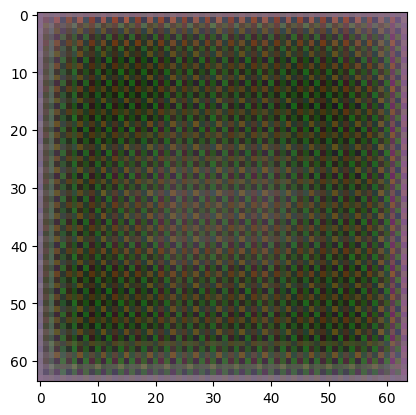

Epoch 2/200: 100%|██████████| 8/8 [00:04<00:00,  1.75it/s]


Epoch 1 , Loss:  23695.130126953125


Epoch 3/200: 100%|██████████| 8/8 [00:04<00:00,  1.73it/s]


Epoch 2 , Loss:  16701.608642578125


Epoch 4/200: 100%|██████████| 8/8 [00:04<00:00,  1.73it/s]


Epoch 3 , Loss:  13455.162841796875


Epoch 5/200: 100%|██████████| 8/8 [00:04<00:00,  1.78it/s]


Epoch 4 , Loss:  11984.055419921875


Epoch 6/200: 100%|██████████| 8/8 [00:04<00:00,  1.77it/s]


Epoch 5 , Loss:  11261.894409179688


Epoch 7/200: 100%|██████████| 8/8 [00:04<00:00,  1.73it/s]


Epoch 6 , Loss:  10806.580932617188


Epoch 8/200: 100%|██████████| 8/8 [00:04<00:00,  1.74it/s]


Epoch 7 , Loss:  10524.167114257812


Epoch 9/200: 100%|██████████| 8/8 [00:04<00:00,  1.77it/s]


Epoch 8 , Loss:  10397.288452148438


Epoch 10/200: 100%|██████████| 8/8 [00:04<00:00,  1.74it/s]


Epoch 9 , Loss:  10181.775024414062


Epoch 11/200: 100%|██████████| 8/8 [00:04<00:00,  1.75it/s]


Epoch 10 , Loss:  9998.830200195312


Epoch 12/200: 100%|██████████| 8/8 [00:04<00:00,  1.73it/s]


Epoch 11 , Loss:  9884.003662109375


Epoch 13/200: 100%|██████████| 8/8 [00:04<00:00,  1.77it/s]


Epoch 12 , Loss:  9791.144775390625


Epoch 14/200: 100%|██████████| 8/8 [00:04<00:00,  1.75it/s]


Epoch 13 , Loss:  9740.299926757812


Epoch 15/200: 100%|██████████| 8/8 [00:04<00:00,  1.75it/s]


Epoch 14 , Loss:  9673.367736816406


Epoch 16/200: 100%|██████████| 8/8 [00:04<00:00,  1.66it/s]


Epoch 15 , Loss:  9495.068420410156


Epoch 17/200: 100%|██████████| 8/8 [00:04<00:00,  1.71it/s]


Epoch 16 , Loss:  9442.31494140625


Epoch 18/200: 100%|██████████| 8/8 [00:04<00:00,  1.75it/s]


Epoch 17 , Loss:  9358.935302734375


Epoch 19/200: 100%|██████████| 8/8 [00:04<00:00,  1.73it/s]


Epoch 18 , Loss:  9327.664184570312


Epoch 20/200: 100%|██████████| 8/8 [00:04<00:00,  1.71it/s]


Epoch 19 , Loss:  9144.468505859375


Epoch 21/200: 100%|██████████| 8/8 [00:04<00:00,  1.62it/s]


Epoch 20 , Loss:  9009.550598144531


Epoch 22/200: 100%|██████████| 8/8 [00:05<00:00,  1.50it/s]


Epoch 21 , Loss:  8947.650817871094


Epoch 23/200: 100%|██████████| 8/8 [00:04<00:00,  1.67it/s]


Epoch 22 , Loss:  8828.337646484375


Epoch 24/200: 100%|██████████| 8/8 [00:04<00:00,  1.73it/s]


Epoch 23 , Loss:  8719.97705078125


Epoch 25/200: 100%|██████████| 8/8 [00:04<00:00,  1.73it/s]


Epoch 24 , Loss:  8522.463562011719


Epoch 26/200: 100%|██████████| 8/8 [00:04<00:00,  1.69it/s]


Epoch 25 , Loss:  8541.436584472656


Epoch 27/200: 100%|██████████| 8/8 [00:04<00:00,  1.76it/s]


Epoch 26 , Loss:  8300.534912109375


Epoch 28/200: 100%|██████████| 8/8 [00:04<00:00,  1.73it/s]


Epoch 27 , Loss:  8207.571411132812


Epoch 29/200: 100%|██████████| 8/8 [00:04<00:00,  1.76it/s]


Epoch 28 , Loss:  8034.811950683594


Epoch 30/200: 100%|██████████| 8/8 [00:04<00:00,  1.76it/s]


Epoch 29 , Loss:  8024.002685546875


Epoch 31/200: 100%|██████████| 8/8 [00:04<00:00,  1.83it/s]


Epoch 30 , Loss:  8011.697692871094


Epoch 32/200: 100%|██████████| 8/8 [00:04<00:00,  1.82it/s]


Epoch 31 , Loss:  7813.272705078125


Epoch 33/200: 100%|██████████| 8/8 [00:05<00:00,  1.40it/s]


Epoch 32 , Loss:  7686.435729980469


Epoch 34/200: 100%|██████████| 8/8 [00:04<00:00,  1.65it/s]


Epoch 33 , Loss:  7604.6634521484375


Epoch 35/200: 100%|██████████| 8/8 [00:04<00:00,  1.79it/s]


Epoch 34 , Loss:  7418.13623046875


Epoch 36/200: 100%|██████████| 8/8 [00:04<00:00,  1.82it/s]


Epoch 35 , Loss:  7384.7886962890625


Epoch 37/200: 100%|██████████| 8/8 [00:04<00:00,  1.79it/s]


Epoch 36 , Loss:  7287.9815673828125


Epoch 38/200: 100%|██████████| 8/8 [00:04<00:00,  1.83it/s]


Epoch 37 , Loss:  7277.983581542969


Epoch 39/200: 100%|██████████| 8/8 [00:04<00:00,  1.82it/s]


Epoch 38 , Loss:  7158.166809082031


Epoch 40/200: 100%|██████████| 8/8 [00:04<00:00,  1.82it/s]


Epoch 39 , Loss:  7053.341796875


Epoch 41/200: 100%|██████████| 8/8 [00:04<00:00,  1.77it/s]


Epoch 40 , Loss:  6923.288818359375


Epoch 42/200: 100%|██████████| 8/8 [00:04<00:00,  1.81it/s]


Epoch 41 , Loss:  6853.766540527344


Epoch 43/200: 100%|██████████| 8/8 [00:04<00:00,  1.79it/s]


Epoch 42 , Loss:  6766.246398925781


Epoch 44/200: 100%|██████████| 8/8 [00:04<00:00,  1.79it/s]


Epoch 43 , Loss:  6676.5281982421875


Epoch 45/200: 100%|██████████| 8/8 [00:04<00:00,  1.75it/s]


Epoch 44 , Loss:  6570.17919921875


Epoch 46/200: 100%|██████████| 8/8 [00:04<00:00,  1.76it/s]


Epoch 45 , Loss:  6491.667175292969


Epoch 47/200: 100%|██████████| 8/8 [00:04<00:00,  1.76it/s]


Epoch 46 , Loss:  6423.0634765625


Epoch 48/200: 100%|██████████| 8/8 [00:04<00:00,  1.80it/s]


Epoch 47 , Loss:  6426.239196777344


Epoch 49/200: 100%|██████████| 8/8 [00:04<00:00,  1.82it/s]


Epoch 48 , Loss:  6376.831604003906


Epoch 50/200: 100%|██████████| 8/8 [00:04<00:00,  1.77it/s]


Epoch 49 , Loss:  6276.396911621094


Epoch 51/200: 100%|██████████| 8/8 [00:04<00:00,  1.87it/s]

Epoch 50 , Loss:  6170.495849609375


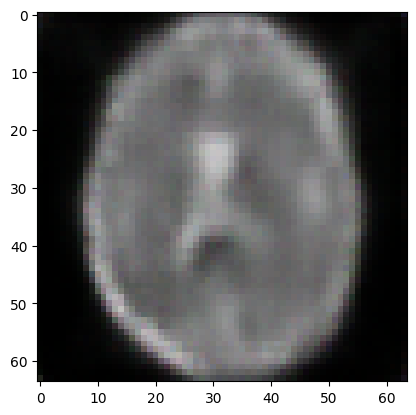

Epoch 52/200: 100%|██████████| 8/8 [00:04<00:00,  1.80it/s]


Epoch 51 , Loss:  6087.365051269531


Epoch 53/200: 100%|██████████| 8/8 [00:04<00:00,  1.77it/s]


Epoch 52 , Loss:  5938.4111328125


Epoch 54/200: 100%|██████████| 8/8 [00:04<00:00,  1.74it/s]


Epoch 53 , Loss:  5888.424743652344


Epoch 55/200: 100%|██████████| 8/8 [00:04<00:00,  1.80it/s]


Epoch 54 , Loss:  5780.865295410156


Epoch 56/200: 100%|██████████| 8/8 [00:04<00:00,  1.79it/s]


Epoch 55 , Loss:  5725.45703125


Epoch 57/200: 100%|██████████| 8/8 [00:04<00:00,  1.83it/s]


Epoch 56 , Loss:  5738.3258056640625


Epoch 58/200: 100%|██████████| 8/8 [00:04<00:00,  1.85it/s]


Epoch 57 , Loss:  5587.217102050781


Epoch 59/200: 100%|██████████| 8/8 [00:04<00:00,  1.81it/s]


Epoch 58 , Loss:  5537.2025146484375


Epoch 60/200: 100%|██████████| 8/8 [00:04<00:00,  1.84it/s]


Epoch 59 , Loss:  5417.244140625


Epoch 61/200: 100%|██████████| 8/8 [00:04<00:00,  1.83it/s]


Epoch 60 , Loss:  5363.8018798828125


Epoch 62/200: 100%|██████████| 8/8 [00:04<00:00,  1.82it/s]


Epoch 61 , Loss:  5281.191162109375


Epoch 63/200: 100%|██████████| 8/8 [00:04<00:00,  1.78it/s]


Epoch 62 , Loss:  5226.1292724609375


Epoch 64/200: 100%|██████████| 8/8 [00:04<00:00,  1.82it/s]


Epoch 63 , Loss:  5150.323486328125


Epoch 65/200: 100%|██████████| 8/8 [00:04<00:00,  1.82it/s]


Epoch 64 , Loss:  5114.9490966796875


Epoch 66/200: 100%|██████████| 8/8 [00:04<00:00,  1.85it/s]


Epoch 65 , Loss:  5067.701904296875


Epoch 67/200: 100%|██████████| 8/8 [00:04<00:00,  1.82it/s]


Epoch 66 , Loss:  4971.9986572265625


Epoch 68/200: 100%|██████████| 8/8 [00:04<00:00,  1.80it/s]


Epoch 67 , Loss:  4913.1121826171875


Epoch 69/200: 100%|██████████| 8/8 [00:04<00:00,  1.82it/s]


Epoch 68 , Loss:  4881.702880859375


Epoch 70/200: 100%|██████████| 8/8 [00:04<00:00,  1.82it/s]


Epoch 69 , Loss:  4789.596008300781


Epoch 71/200: 100%|██████████| 8/8 [00:04<00:00,  1.85it/s]


Epoch 70 , Loss:  4735.074890136719


Epoch 72/200: 100%|██████████| 8/8 [00:04<00:00,  1.78it/s]


Epoch 71 , Loss:  4681.33056640625


Epoch 73/200: 100%|██████████| 8/8 [00:04<00:00,  1.82it/s]


Epoch 72 , Loss:  4640.216064453125


Epoch 74/200: 100%|██████████| 8/8 [00:04<00:00,  1.86it/s]


Epoch 73 , Loss:  4573.4046630859375


Epoch 75/200: 100%|██████████| 8/8 [00:04<00:00,  1.80it/s]


Epoch 74 , Loss:  4608.353820800781


Epoch 76/200: 100%|██████████| 8/8 [00:04<00:00,  1.79it/s]


Epoch 75 , Loss:  4589.0472412109375


Epoch 77/200: 100%|██████████| 8/8 [00:04<00:00,  1.79it/s]


Epoch 76 , Loss:  4497.7730712890625


Epoch 78/200: 100%|██████████| 8/8 [00:04<00:00,  1.83it/s]


Epoch 77 , Loss:  4410.3548583984375


Epoch 79/200: 100%|██████████| 8/8 [00:04<00:00,  1.79it/s]


Epoch 78 , Loss:  4327.364685058594


Epoch 80/200: 100%|██████████| 8/8 [00:04<00:00,  1.78it/s]


Epoch 79 , Loss:  4293.644134521484


Epoch 81/200: 100%|██████████| 8/8 [00:04<00:00,  1.80it/s]


Epoch 80 , Loss:  4259.485107421875


Epoch 82/200: 100%|██████████| 8/8 [00:04<00:00,  1.81it/s]


Epoch 81 , Loss:  4217.319885253906


Epoch 83/200: 100%|██████████| 8/8 [00:04<00:00,  1.75it/s]


Epoch 82 , Loss:  4186.315185546875


Epoch 84/200: 100%|██████████| 8/8 [00:04<00:00,  1.81it/s]


Epoch 83 , Loss:  4147.608367919922


Epoch 85/200: 100%|██████████| 8/8 [00:04<00:00,  1.81it/s]


Epoch 84 , Loss:  4111.439117431641


Epoch 86/200: 100%|██████████| 8/8 [00:04<00:00,  1.80it/s]


Epoch 85 , Loss:  4065.7188720703125


Epoch 87/200: 100%|██████████| 8/8 [00:04<00:00,  1.82it/s]


Epoch 86 , Loss:  4000.41650390625


Epoch 88/200: 100%|██████████| 8/8 [00:04<00:00,  1.72it/s]


Epoch 87 , Loss:  3962.134735107422


Epoch 89/200: 100%|██████████| 8/8 [00:04<00:00,  1.74it/s]


Epoch 88 , Loss:  3933.9750061035156


Epoch 90/200: 100%|██████████| 8/8 [00:04<00:00,  1.74it/s]


Epoch 89 , Loss:  3865.8689880371094


Epoch 91/200: 100%|██████████| 8/8 [00:04<00:00,  1.73it/s]


Epoch 90 , Loss:  3842.5160217285156


Epoch 92/200: 100%|██████████| 8/8 [00:04<00:00,  1.76it/s]


Epoch 91 , Loss:  3795.9072875976562


Epoch 93/200: 100%|██████████| 8/8 [00:04<00:00,  1.72it/s]


Epoch 92 , Loss:  3812.798309326172


Epoch 94/200: 100%|██████████| 8/8 [00:04<00:00,  1.76it/s]


Epoch 93 , Loss:  3790.648468017578


Epoch 95/200: 100%|██████████| 8/8 [00:04<00:00,  1.68it/s]


Epoch 94 , Loss:  3737.3943786621094


Epoch 96/200: 100%|██████████| 8/8 [00:04<00:00,  1.70it/s]


Epoch 95 , Loss:  3719.820556640625


Epoch 97/200: 100%|██████████| 8/8 [00:04<00:00,  1.72it/s]


Epoch 96 , Loss:  3697.7679443359375


Epoch 98/200: 100%|██████████| 8/8 [00:04<00:00,  1.74it/s]


Epoch 97 , Loss:  3656.412353515625


Epoch 99/200: 100%|██████████| 8/8 [00:04<00:00,  1.73it/s]


Epoch 98 , Loss:  3607.346221923828


Epoch 100/200: 100%|██████████| 8/8 [00:04<00:00,  1.69it/s]


Epoch 99 , Loss:  3540.2406311035156


Epoch 101/200: 100%|██████████| 8/8 [00:04<00:00,  1.73it/s]

Epoch 100 , Loss:  3520.655975341797


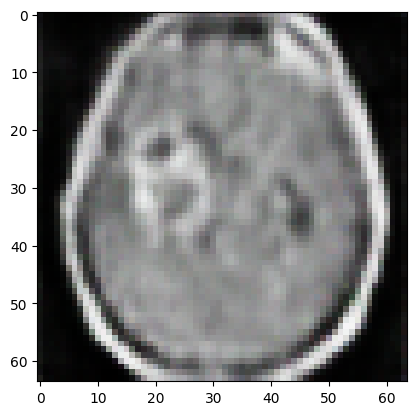

Epoch 102/200: 100%|██████████| 8/8 [00:04<00:00,  1.76it/s]


Epoch 101 , Loss:  3495.018798828125


Epoch 103/200: 100%|██████████| 8/8 [00:04<00:00,  1.72it/s]


Epoch 102 , Loss:  3444.7755737304688


Epoch 104/200: 100%|██████████| 8/8 [00:04<00:00,  1.74it/s]


Epoch 103 , Loss:  3448.1046447753906


Epoch 105/200: 100%|██████████| 8/8 [00:04<00:00,  1.74it/s]


Epoch 104 , Loss:  3416.4073791503906


Epoch 106/200: 100%|██████████| 8/8 [00:04<00:00,  1.71it/s]


Epoch 105 , Loss:  3384.6832275390625


Epoch 107/200: 100%|██████████| 8/8 [00:04<00:00,  1.70it/s]


Epoch 106 , Loss:  3392.1425170898438


Epoch 108/200: 100%|██████████| 8/8 [00:04<00:00,  1.69it/s]


Epoch 107 , Loss:  3346.1836547851562


Epoch 109/200: 100%|██████████| 8/8 [00:04<00:00,  1.73it/s]


Epoch 108 , Loss:  3316.913116455078


Epoch 110/200: 100%|██████████| 8/8 [00:04<00:00,  1.74it/s]


Epoch 109 , Loss:  3347.707550048828


Epoch 111/200: 100%|██████████| 8/8 [00:04<00:00,  1.77it/s]


Epoch 110 , Loss:  3316.8216857910156


Epoch 112/200: 100%|██████████| 8/8 [00:04<00:00,  1.76it/s]


Epoch 111 , Loss:  3295.6312866210938


Epoch 113/200: 100%|██████████| 8/8 [00:04<00:00,  1.72it/s]


Epoch 112 , Loss:  3222.9041442871094


Epoch 114/200: 100%|██████████| 8/8 [00:04<00:00,  1.77it/s]


Epoch 113 , Loss:  3239.964080810547


Epoch 115/200: 100%|██████████| 8/8 [00:04<00:00,  1.74it/s]


Epoch 114 , Loss:  3193.6032104492188


Epoch 116/200: 100%|██████████| 8/8 [00:04<00:00,  1.72it/s]


Epoch 115 , Loss:  3189.114532470703


Epoch 117/200: 100%|██████████| 8/8 [00:04<00:00,  1.77it/s]


Epoch 116 , Loss:  3142.851318359375


Epoch 118/200: 100%|██████████| 8/8 [00:04<00:00,  1.72it/s]


Epoch 117 , Loss:  3145.6521911621094


Epoch 119/200: 100%|██████████| 8/8 [00:04<00:00,  1.75it/s]


Epoch 118 , Loss:  3089.5575256347656


Epoch 120/200: 100%|██████████| 8/8 [00:04<00:00,  1.72it/s]


Epoch 119 , Loss:  3061.7582397460938


Epoch 121/200: 100%|██████████| 8/8 [00:04<00:00,  1.75it/s]


Epoch 120 , Loss:  3079.7565307617188


Epoch 122/200: 100%|██████████| 8/8 [00:04<00:00,  1.76it/s]


Epoch 121 , Loss:  3042.2450256347656


Epoch 123/200: 100%|██████████| 8/8 [00:04<00:00,  1.73it/s]


Epoch 122 , Loss:  3012.0831909179688


Epoch 124/200: 100%|██████████| 8/8 [00:04<00:00,  1.77it/s]


Epoch 123 , Loss:  2968.103485107422


Epoch 125/200: 100%|██████████| 8/8 [00:04<00:00,  1.75it/s]


Epoch 124 , Loss:  2997.9922485351562


Epoch 126/200: 100%|██████████| 8/8 [00:04<00:00,  1.74it/s]


Epoch 125 , Loss:  2942.388671875


Epoch 127/200: 100%|██████████| 8/8 [00:04<00:00,  1.74it/s]


Epoch 126 , Loss:  2963.949493408203


Epoch 128/200: 100%|██████████| 8/8 [00:04<00:00,  1.74it/s]


Epoch 127 , Loss:  2900.1807556152344


Epoch 129/200: 100%|██████████| 8/8 [00:04<00:00,  1.74it/s]


Epoch 128 , Loss:  2890.6700744628906


Epoch 130/200: 100%|██████████| 8/8 [00:04<00:00,  1.73it/s]


Epoch 129 , Loss:  2852.8679809570312


Epoch 131/200: 100%|██████████| 8/8 [00:04<00:00,  1.70it/s]


Epoch 130 , Loss:  2866.4255981445312


Epoch 132/200: 100%|██████████| 8/8 [00:04<00:00,  1.76it/s]


Epoch 131 , Loss:  2837.4112243652344


Epoch 133/200: 100%|██████████| 8/8 [00:04<00:00,  1.73it/s]


Epoch 132 , Loss:  2816.5826110839844


Epoch 134/200: 100%|██████████| 8/8 [00:04<00:00,  1.76it/s]


Epoch 133 , Loss:  2783.0702514648438


Epoch 135/200: 100%|██████████| 8/8 [00:04<00:00,  1.71it/s]


Epoch 134 , Loss:  2791.315887451172


Epoch 136/200: 100%|██████████| 8/8 [00:04<00:00,  1.77it/s]


Epoch 135 , Loss:  2788.3607482910156


Epoch 137/200: 100%|██████████| 8/8 [00:04<00:00,  1.80it/s]


Epoch 136 , Loss:  2761.1336364746094


Epoch 138/200: 100%|██████████| 8/8 [00:04<00:00,  1.74it/s]


Epoch 137 , Loss:  2741.7387084960938


Epoch 139/200: 100%|██████████| 8/8 [00:04<00:00,  1.75it/s]


Epoch 138 , Loss:  2723.8055114746094


Epoch 140/200: 100%|██████████| 8/8 [00:04<00:00,  1.75it/s]


Epoch 139 , Loss:  2695.961212158203


Epoch 141/200: 100%|██████████| 8/8 [00:04<00:00,  1.77it/s]


Epoch 140 , Loss:  2687.5667114257812


Epoch 142/200: 100%|██████████| 8/8 [00:04<00:00,  1.73it/s]


Epoch 141 , Loss:  2684.8814697265625


Epoch 143/200: 100%|██████████| 8/8 [00:04<00:00,  1.76it/s]


Epoch 142 , Loss:  2662.2477111816406


Epoch 144/200: 100%|██████████| 8/8 [00:04<00:00,  1.74it/s]


Epoch 143 , Loss:  2643.816162109375


Epoch 145/200: 100%|██████████| 8/8 [00:04<00:00,  1.72it/s]


Epoch 144 , Loss:  2627.4016723632812


Epoch 146/200: 100%|██████████| 8/8 [00:04<00:00,  1.72it/s]


Epoch 145 , Loss:  2612.349639892578


Epoch 147/200: 100%|██████████| 8/8 [00:04<00:00,  1.72it/s]


Epoch 146 , Loss:  2586.5338745117188


Epoch 148/200: 100%|██████████| 8/8 [00:04<00:00,  1.70it/s]


Epoch 147 , Loss:  2581.8164978027344


Epoch 149/200: 100%|██████████| 8/8 [00:04<00:00,  1.72it/s]


Epoch 148 , Loss:  2583.2705078125


Epoch 150/200: 100%|██████████| 8/8 [00:04<00:00,  1.79it/s]


Epoch 149 , Loss:  2554.487335205078


Epoch 151/200: 100%|██████████| 8/8 [00:04<00:00,  1.75it/s]

Epoch 150 , Loss:  2550.4554138183594


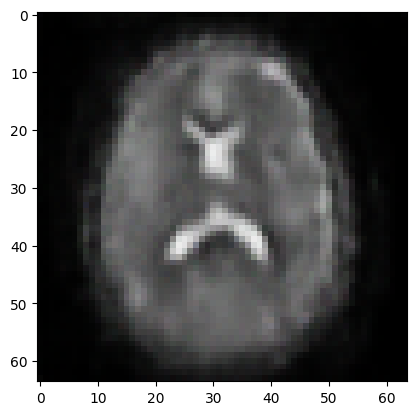

Epoch 152/200: 100%|██████████| 8/8 [00:04<00:00,  1.73it/s]


Epoch 151 , Loss:  2518.8152770996094


Epoch 153/200: 100%|██████████| 8/8 [00:04<00:00,  1.68it/s]


Epoch 152 , Loss:  2510.7135314941406


Epoch 154/200: 100%|██████████| 8/8 [00:04<00:00,  1.73it/s]


Epoch 153 , Loss:  2518.299835205078


Epoch 155/200: 100%|██████████| 8/8 [00:04<00:00,  1.72it/s]


Epoch 154 , Loss:  2508.216064453125


Epoch 156/200: 100%|██████████| 8/8 [00:04<00:00,  1.76it/s]


Epoch 155 , Loss:  2485.19140625


Epoch 157/200: 100%|██████████| 8/8 [00:04<00:00,  1.75it/s]


Epoch 156 , Loss:  2464.5303344726562


Epoch 158/200: 100%|██████████| 8/8 [00:04<00:00,  1.76it/s]


Epoch 157 , Loss:  2443.7228393554688


Epoch 159/200: 100%|██████████| 8/8 [00:04<00:00,  1.75it/s]


Epoch 158 , Loss:  2458.748077392578


Epoch 160/200: 100%|██████████| 8/8 [00:04<00:00,  1.75it/s]


Epoch 159 , Loss:  2451.598419189453


Epoch 161/200: 100%|██████████| 8/8 [00:04<00:00,  1.72it/s]


Epoch 160 , Loss:  2459.881622314453


Epoch 162/200: 100%|██████████| 8/8 [00:04<00:00,  1.76it/s]


Epoch 161 , Loss:  2431.6903686523438


Epoch 163/200: 100%|██████████| 8/8 [00:04<00:00,  1.74it/s]


Epoch 162 , Loss:  2398.483367919922


Epoch 164/200: 100%|██████████| 8/8 [00:04<00:00,  1.73it/s]


Epoch 163 , Loss:  2421.3773193359375


Epoch 165/200: 100%|██████████| 8/8 [00:04<00:00,  1.76it/s]


Epoch 164 , Loss:  2378.888885498047


Epoch 166/200: 100%|██████████| 8/8 [00:04<00:00,  1.74it/s]


Epoch 165 , Loss:  2387.1245727539062


Epoch 167/200: 100%|██████████| 8/8 [00:04<00:00,  1.77it/s]


Epoch 166 , Loss:  2363.1133422851562


Epoch 168/200: 100%|██████████| 8/8 [00:04<00:00,  1.75it/s]


Epoch 167 , Loss:  2344.2647399902344


Epoch 169/200: 100%|██████████| 8/8 [00:04<00:00,  1.79it/s]


Epoch 168 , Loss:  2312.9774780273438


Epoch 170/200: 100%|██████████| 8/8 [00:04<00:00,  1.76it/s]


Epoch 169 , Loss:  2318.4267578125


Epoch 171/200: 100%|██████████| 8/8 [00:04<00:00,  1.77it/s]


Epoch 170 , Loss:  2350.5247192382812


Epoch 172/200: 100%|██████████| 8/8 [00:04<00:00,  1.76it/s]


Epoch 171 , Loss:  2339.21826171875


Epoch 173/200: 100%|██████████| 8/8 [00:04<00:00,  1.72it/s]


Epoch 172 , Loss:  2339.1987915039062


Epoch 174/200: 100%|██████████| 8/8 [00:04<00:00,  1.72it/s]


Epoch 173 , Loss:  2331.626007080078


Epoch 175/200: 100%|██████████| 8/8 [00:04<00:00,  1.75it/s]


Epoch 174 , Loss:  2323.6943359375


Epoch 176/200: 100%|██████████| 8/8 [00:04<00:00,  1.77it/s]


Epoch 175 , Loss:  2313.5870056152344


Epoch 177/200: 100%|██████████| 8/8 [00:04<00:00,  1.75it/s]


Epoch 176 , Loss:  2301.2913208007812


Epoch 178/200: 100%|██████████| 8/8 [00:04<00:00,  1.77it/s]


Epoch 177 , Loss:  2268.9140625


Epoch 179/200: 100%|██████████| 8/8 [00:04<00:00,  1.76it/s]


Epoch 178 , Loss:  2254.9100952148438


Epoch 180/200: 100%|██████████| 8/8 [00:04<00:00,  1.80it/s]


Epoch 179 , Loss:  2261.7581787109375


Epoch 181/200: 100%|██████████| 8/8 [00:04<00:00,  1.75it/s]


Epoch 180 , Loss:  2224.8724365234375


Epoch 182/200: 100%|██████████| 8/8 [00:04<00:00,  1.75it/s]


Epoch 181 , Loss:  2204.840576171875


Epoch 183/200: 100%|██████████| 8/8 [00:04<00:00,  1.76it/s]


Epoch 182 , Loss:  2194.3392333984375


Epoch 184/200: 100%|██████████| 8/8 [00:04<00:00,  1.71it/s]


Epoch 183 , Loss:  2216.9845581054688


Epoch 185/200: 100%|██████████| 8/8 [00:04<00:00,  1.75it/s]


Epoch 184 , Loss:  2192.8140258789062


Epoch 186/200: 100%|██████████| 8/8 [00:04<00:00,  1.71it/s]


Epoch 185 , Loss:  2180.7523193359375


Epoch 187/200: 100%|██████████| 8/8 [00:04<00:00,  1.73it/s]


Epoch 186 , Loss:  2207.0084228515625


Epoch 188/200: 100%|██████████| 8/8 [00:04<00:00,  1.74it/s]


Epoch 187 , Loss:  2198.1600646972656


Epoch 189/200: 100%|██████████| 8/8 [00:04<00:00,  1.75it/s]


Epoch 188 , Loss:  2166.822296142578


Epoch 190/200: 100%|██████████| 8/8 [00:04<00:00,  1.74it/s]


Epoch 189 , Loss:  2163.301788330078


Epoch 191/200: 100%|██████████| 8/8 [00:04<00:00,  1.74it/s]


Epoch 190 , Loss:  2177.567626953125


Epoch 192/200: 100%|██████████| 8/8 [00:04<00:00,  1.74it/s]


Epoch 191 , Loss:  2150.3163452148438


Epoch 193/200: 100%|██████████| 8/8 [00:04<00:00,  1.73it/s]


Epoch 192 , Loss:  2152.8684997558594


Epoch 194/200: 100%|██████████| 8/8 [00:04<00:00,  1.73it/s]


Epoch 193 , Loss:  2139.33251953125


Epoch 195/200: 100%|██████████| 8/8 [00:04<00:00,  1.76it/s]


Epoch 194 , Loss:  2140.9918823242188


Epoch 196/200: 100%|██████████| 8/8 [00:04<00:00,  1.76it/s]


Epoch 195 , Loss:  2124.9248046875


Epoch 197/200: 100%|██████████| 8/8 [00:04<00:00,  1.75it/s]


Epoch 196 , Loss:  2124.1807708740234


Epoch 198/200: 100%|██████████| 8/8 [00:04<00:00,  1.72it/s]


Epoch 197 , Loss:  2100.8706970214844


Epoch 199/200: 100%|██████████| 8/8 [00:04<00:00,  1.72it/s]


Epoch 198 , Loss:  2120.8199310302734


Epoch 200/200: 100%|██████████| 8/8 [00:04<00:00,  1.71it/s]

Epoch 199 , Loss:  2111.237319946289


In [44]:
model = BetaVAE(latent_dim=128, beta=4.0).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

epochs=200
for epoch in range(epochs):
    run_loss = 0
    
    loop = tqdm(dataloader, desc=f"Epoch {epoch+1}/{epochs}")
    for imgs, _ in loop:
        imgs = imgs.to(device)
        optimizer.zero_grad()
        recon, mu, logvar = model(imgs)
        loss, recon_loss, kl = model.loss_function(recon, imgs, mu, logvar)
        loss.backward()
        optimizer.step()
        run_loss += loss.item()
            
    print("Epoch", epoch, ", Loss: ", run_loss)
    if epoch%50 == 0:
        with torch.no_grad():
            sample_imgs = imgs[:8]
            fake = model(sample_imgs.to(device))[0]
        img = fake[0].cpu().permute(1, 2, 0).numpy()
        img = (img + 1) / 2.0
        plt.imshow(img)
        plt.show()

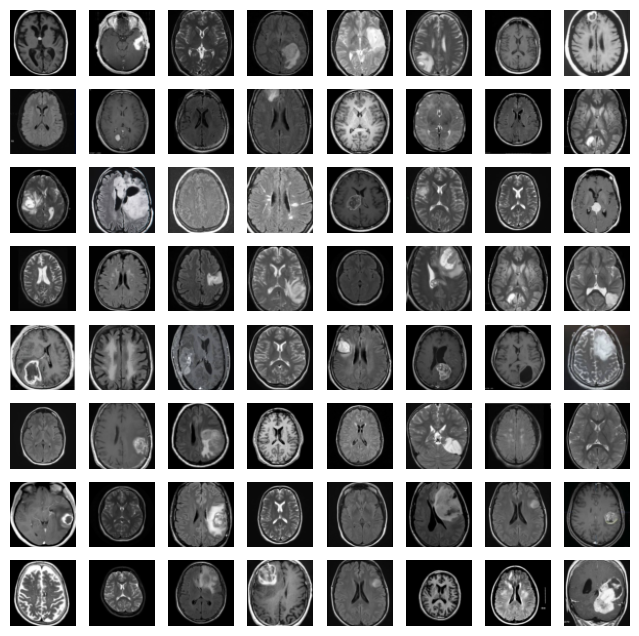

In [51]:

fig, axes = plt.subplots(8, 8, figsize=(8, 8))

real_images_scaled = []
for i, ax in enumerate(axes.flat):
    img = batch1[0][i].cpu().permute(1, 2, 0).numpy()
    img = (img + 1) / 2.0
    real_images_scaled.append(img)
    ax.imshow(img)
    ax.axis("off")

real_images = next(iter(dataloader))
for i in range(64):
    img = batch2[0][i].cpu().permute(1, 2, 0).numpy()
    img = (img + 1) / 2.0
    real_images_scaled.append(img)

real_images = next(iter(dataloader))
for i in range(64):
    img = batch3[0][i].cpu().permute(1, 2, 0).numpy()
    img = (img + 1) / 2.0
    real_images_scaled.append(img)

fig.savefig("model_3_images.pdf", bbox_inches='tight')

plt.show()

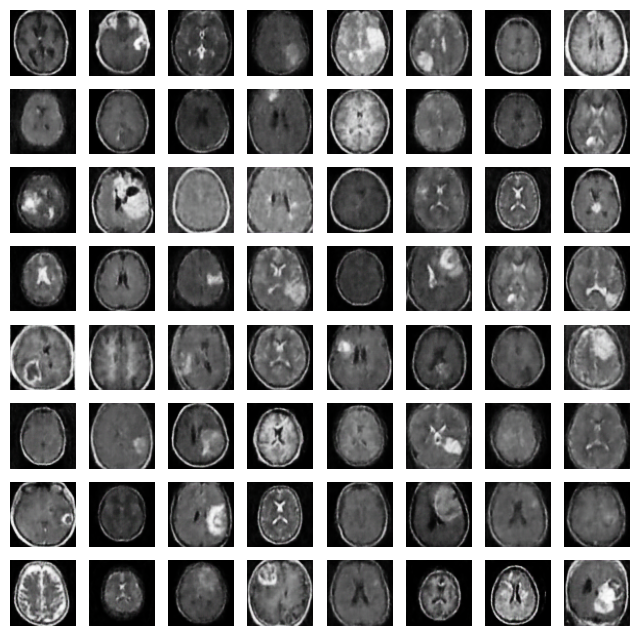

In [52]:
# fake images
with torch.no_grad():
    sample_imgs = batch1[0][:64]
    fake = model(sample_imgs.to(device))[0].detach().cpu()

fig, axes = plt.subplots(8, 8, figsize=(8, 8))

fake_images_scaled = []
for i, ax in enumerate(axes.flat):
    img = fake[i].cpu().permute(1, 2, 0).numpy()
    img = (img + 1) / 2.0
    fake_images_scaled.append(img)
    ax.imshow(img)
    ax.axis("off")

real_images = next(iter(dataloader))
with torch.no_grad():
    sample_imgs = batch2[0][:64]
    fake = model(sample_imgs.to(device))[0].detach().cpu()

for i in range(64):
    img = fake[i].cpu().permute(1, 2, 0).numpy()
    img = (img + 1) / 2.0
    fake_images_scaled.append(img)


real_images = next(iter(dataloader))
with torch.no_grad():
    sample_imgs = batch3[0][:64]
    fake = model(sample_imgs.to(device))[0].detach().cpu()
for i in range(64):
    img = fake[i].cpu().permute(1, 2, 0).numpy()
    img = (img + 1) / 2.0
    fake_images_scaled.append(img)

fig.savefig("model_3_fake.pdf", bbox_inches='tight')

plt.show()

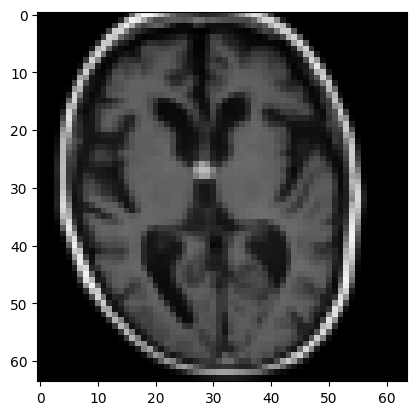

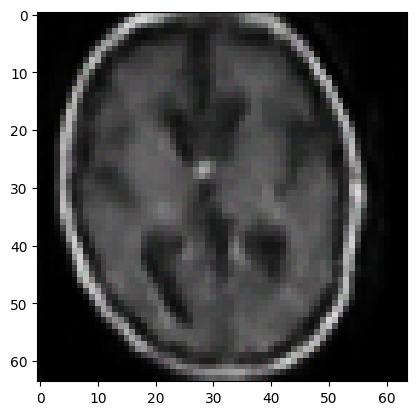

In [53]:
plt.imshow(real_images_scaled[0])
plt.savefig("sample_image_vae_real.pdf", bbox_inches='tight')
plt.show()
plt.imshow(fake_images_scaled[0])
plt.savefig("sample_image_vae_fake.pdf", bbox_inches='tight')
plt.show()

In [47]:
from tqdm import tqdm
fake_images_scaled = np.array(fake_images_scaled)
real_images_scaled = np.array(real_images_scaled)

compare = ImageSimilarity()

psnr_count = []
for fake_img, real_img in zip(fake_images_scaled, real_images_scaled):
    psnr_count.append(compare.psnr(real_img, fake_img))

mse_count = []
for fake_img, real_img in zip(fake_images_scaled, real_images_scaled):
    mse_count.append(compare.mse(real_img, fake_img))

ssim_score_count = []
for fake_img, real_img in zip(fake_images_scaled, real_images_scaled):
    ssim_score_count.append(compare.ssim_score(real_img, fake_img))

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


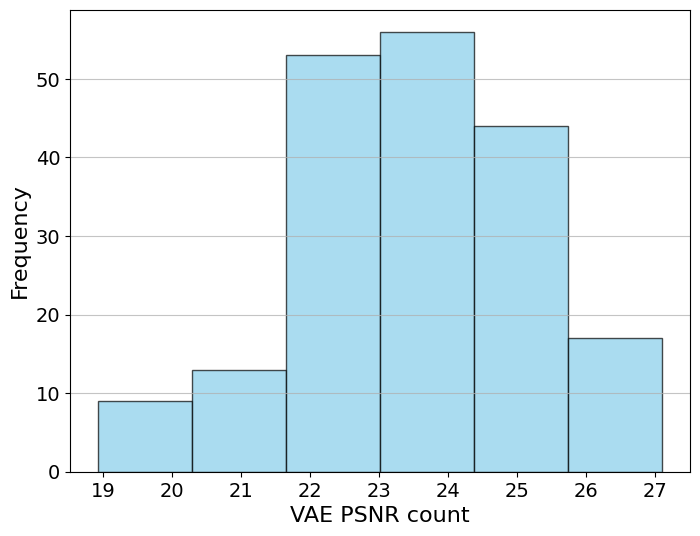

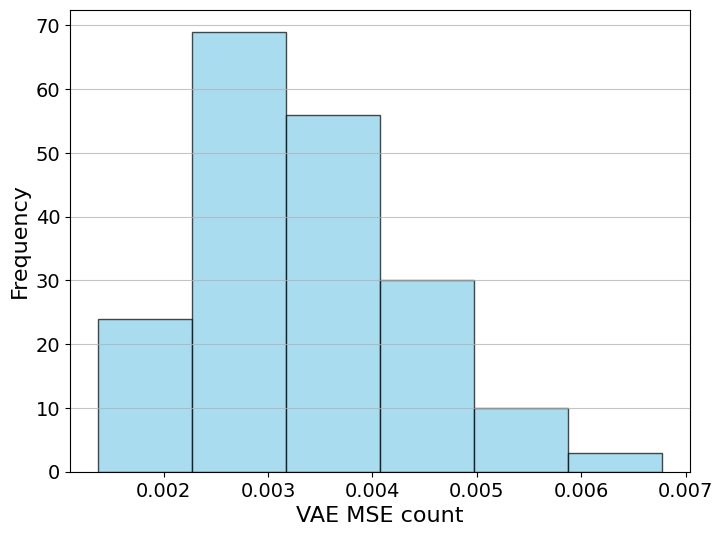

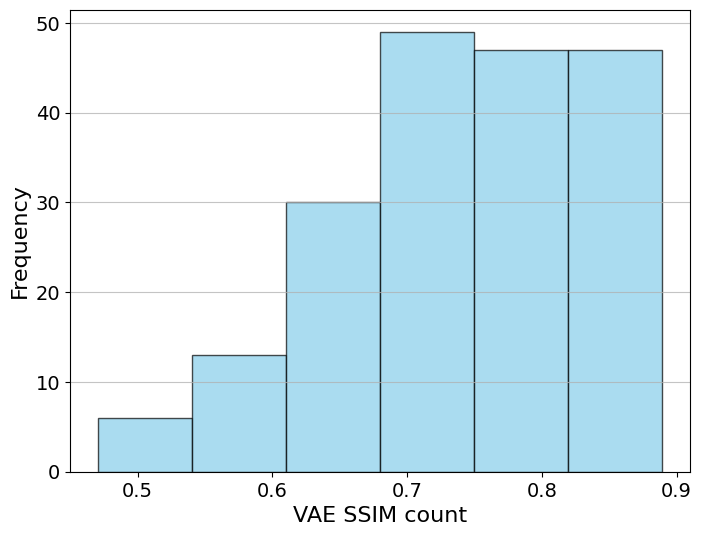

In [48]:
import matplotlib.pyplot as plt

plot_hist(psnr_count, what2plot="VAE PSNR count")
plot_hist(mse_count, what2plot="VAE MSE count")
plot_hist(ssim_score_count, what2plot="VAE SSIM count")

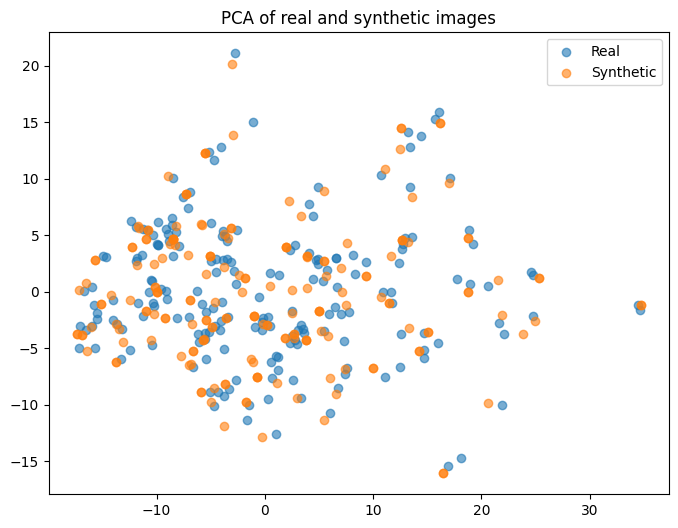

In [49]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

fake_images_scaled = np.array(fake_images_scaled)
real_images_scaled = np.array(real_images_scaled)

fake_images_scaled = fake_images_scaled.reshape(fake_images_scaled.shape[0], -1)
real_images_scaled = real_images_scaled.reshape(real_images_scaled.shape[0], -1)

X = np.vstack((fake_images_scaled, real_images_scaled))
y = np.array([0]*len(fake_images_scaled) + [1]*len(real_images_scaled))  # labels: 0=A, 1=B

pca = PCA(n_components=2)
X_embedded = pca.fit_transform(X)

# Plot
plt.figure(figsize=(8,6))
plt.scatter(X_embedded[y==0, 0], X_embedded[y==0, 1], label="Real", alpha=0.6)
plt.scatter(X_embedded[y==1, 0], X_embedded[y==1, 1], label="Synthetic", alpha=0.6)
plt.legend()
plt.title("PCA of real and synthetic images")
plt.savefig("model_3_pca.pdf", bbox_inches='tight')
plt.show()